#### 부스팅(Boosting)

- 여러 개의 모델이 순차적으로 학습을 진행
- 이전 모델이 예측이 틀린 데이터에 대해 올바르게 예측할 수 있도록 다음 모델에게 가중치를 부여하면서 학습과 예측을 진행
- 오류가 큰 데이터에 더 많은 가중치를 부여하여 모델을 강화
- 계속하여 모델에게 가중치를 부스팅하며 학습을 진행하기에 부스팅 방식이라고 불림
- 순차적으로 학습하기에 배깅 방식과는 달리 훈련을 동시에 진행할 수 없으므로 훈련시간이 오래걸림
- 대표적인 부스팅 알고리즘 : Gradient Boosting, AdaBoost, XGBoost

![](https://velog.velcdn.com/images/newnew_daddy/post/91a8df59-7a6a-4f7a-a324-c70d972f3803/image.png)

---

#### 배깅 vs 부스팅
- 배깅 : 여러 학습 모델을 병렬적으로 학습하여 각각의 예측 결과를 평균내거나 투표를 통해 결합
- 부스팅 : 학습 모델을 순차적으로 학습시키며, 각 모델이 이전 모델의 오류를 보완하도록 가중치를 조정하여 결합

![](https://velog.velcdn.com/images/newnew_daddy/post/a4b64e88-06a1-4487-a30f-ab8e7a71bce0/image.png)


#### 1. AdaBoost
- Adaptive + Boosting의 줄임말
- 약한 분류기(weak classifier)들이 상호보완 하도록 순차적(sequential)으로 학습하고, 이들을 조합하여 최종적으로 강한 분류기(strong classifier)의 성능을 향상
- 작동 방법
  1. 성능이 좋지 않은 약한 분류기(weak classifier)들은 한 번에 하나씩 순차적으로 학습을 진행
  2. 먼저 학습된 분류기가 제대로 분류한 결과 정보와 잘못 분류한 결과 정보를 다음 분류기에 전달
  3. 다음 분류기는 이전 분류기로부터 받은 정보를 활용하여 잘 분류해내지 못한 데이터들의 가중치(weight)를 높인다.(가중치를 adaptive하게 바꿈)
  4. 최종 분류기(strong classifier)는 이전에 학습한 약한 분류기들에 각각 가중치를 적용하고 조합하여 학습을 진행

![](https://velog.velcdn.com/images/newnew_daddy/post/2dc5dc94-652a-4b0b-bde6-76d1e33f07aa/image.png)

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier

df = pd.read_csv('./dataset/sample_multiclass_dataset.csv')

In [2]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

((350, 6), (150, 6), (350,), (150,))

#### AdaBoostClassifier 메소드의 주요 인자 설명

```python
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(
    base_estimator=None,      # 기본 학습기로 사용할 모델. 기본값은 DecisionTreeClassifier
    n_estimators=50,          # 사용할 최대 학습기 개수. 기본값은 50
    learning_rate=1.0,        # 각 학습기 기여도 조절을 위한 학습률. 기본값은 1.0
    algorithm='SAMME.R',      # 사용할 알고리즘 ('SAMME' 또는 'SAMME.R'). 기본값은 'SAMME.R'
    random_state=None         # 난수 시드를 설정해 재현성을 확보. 기본값은 None
)
```

In [7]:
ada = AdaBoostClassifier(random_state=42)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

c:\Users\YEIN\.conda\envs\Pyspark\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [8]:
## 모델 성능 평가

print(ada.score(X_train, y_train))
print(ada.score(X_test, y_test))

0.7742857142857142
0.7


Accuracy: 0.700
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        37
           1       0.89      0.93      0.91        27
           2       0.77      0.47      0.59        51
           3       0.27      0.64      0.38        14
           4       0.72      0.86      0.78        21

    accuracy                           0.70       150
   macro avg       0.71      0.74      0.70       150
weighted avg       0.77      0.70      0.71       150

Confusion Matrix:
[[29  0  4  3  1]
 [ 1 25  1  0  0]
 [ 0  0 24 21  6]
 [ 2  3  0  9  0]
 [ 1  0  2  0 18]]
--------------------------------------------------


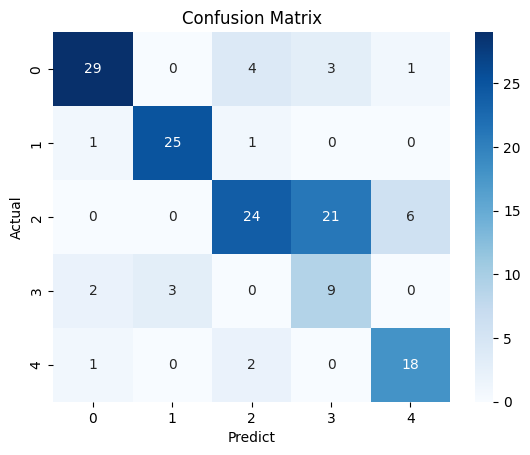

In [9]:
from utils import evaluate_cls_model

evaluate_cls_model(y_pred, y_test)

#### 2. Gradient Boosting
- Gradient Descent + Boosting의 줄임말
- 약한 학습기(weak learner)들이 순차적으로 학습되며, 각 단계에서 이전 학습기의 오류를 줄이는 방향으로 모델을 최적화
- 작동 방법
  1. 첫 번째 약한 학습기(weak learner)가 초기 데이터를 학습하여 예측 모델을 생성
  2. 이 모델이 만든 예측과 실제 값의 차이(잔차, residual)를 계산
  3. 다음 학습기에서는 이 잔차를 학습하여 예측 모델을 개선
  4. 이 과정에서 손실 함수를 최소화하기 위해 경사 하강법(gradient descent)을 사용하여 최적화
  5. 최종 모델(strong learner)은 모든 약한 학습기들의 예측을 합산하여 예측을 수행, 각 학습기의 기여도는 학습 과정에서 조정됨

![](https://velog.velcdn.com/images/newnew_daddy/post/cdb51e5b-22f3-45f1-9ddf-bb7cb05c4080/image.png)

#### GradientBoostingClassifier 메소드의 주요 인자 설명

```python
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(
    learning_rate=0.1,                    # 각 트리의 기여도를 축소시키는 학습률. 기본값은 0.1
    n_estimators=100,                     # 부스팅 단계의 개수. 기본값은 100
    subsample=1.0,                        # 각 기본 학습기에 사용할 훈련 샘플의 비율. 기본값은 1.0
    min_samples_split=2,                  # 노드를 분할하기 위한 최소 샘플 수. 기본값은 2
    min_samples_leaf=1,                   # 리프 노드에 있어야 할 최소 샘플 수. 기본값은 1
    max_depth=3,                          # 개별 회귀 추정기의 최대 깊이. 기본값은 3
    random_state=None                     # 난수 시드를 설정해 재현성을 확보. 기본값은 None
)
```

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)

gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

In [11]:
## 모델 성능 평가

print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

1.0
0.9


Accuracy: 0.900
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       1.00      0.93      0.97        30
           2       0.77      0.83      0.80        29
           3       0.97      0.91      0.94        35
           4       0.92      0.85      0.88        27

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.91      0.90      0.90       150

Confusion Matrix:
[[28  0  0  0  1]
 [ 1 28  1  0  0]
 [ 3  0 24  1  1]
 [ 1  0  2 32  0]
 [ 0  0  4  0 23]]
--------------------------------------------------


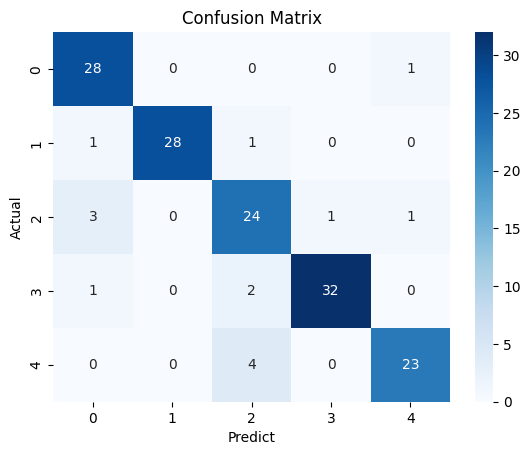

In [12]:
from utils import evaluate_cls_model

evaluate_cls_model(y_pred, y_test)

#### 3. XGBoost
- eXtreme Gradient Boosting의 줄임말
- Gradient Boosting을 기반으로 한 고성능 앙상블 기법으로, 경량화된 구현과 성능 향상을 위한 다양한 기술을 포함
- 작동 방법
  1. 기본적으로 Gradient Boosting과 유사하게 작동하나, 추가적으로 정규화(term regularization)와 같은 기법을 포함하여 과적합을 방지
  2. 병렬 처리를 지원하여 학습 속도를 크게 향상
  3. 각 학습 단계에서 최적의 분할을 찾기 위해 지니 계수(Gini coefficient)나 엔트로피(entropy)를 활용
  4. 모델 평가를 위해 교차 검증(cross-validation)을 활용하여 최적의 모델을 찾고, 조기 종료(early stopping) 기능으로 불필요한 학습을 방지
  5. 최종 모델은 여러 개의 약한 학습기들의 조합으로 구성되며, 각 학습기의 중요도를 반영하여 최종 예측을 수행
- `xgboost`라는 별도의 라이브러리 설치 후 사용 가능
  - `pip install xgboost`

In [15]:
import xgboost as xgb

#### XGBClassifier 메소드의 주요 인자 설명
-> [Docs](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)

```python
from xgboost import XGBClassifier

model = XGBClassifier(
    max_depth=6,               # 개별 트리의 최대 깊이. 트리의 복잡도를 조절하며 과적합을 방지. 기본값은 6
    learning_rate=0.3,         # 학습률 (eta). 각 트리의 기여도를 축소시켜 모델의 학습을 안정화. 기본값은 0.3
    n_estimators=100,          # 부스팅 단계의 개수. 기본값은 100
    verbosity=1,               # 학습 중 출력되는 메시지의 수준. 0이면 조용함, 1이면 정보성 메시지. 기본값은 1
    objective='binary:logistic', # 학습 목표 함수. 'binary:logistic'은 이진 분류에 사용. 기본값은 'binary:logistic'
    booster='gbtree',          # 부스터 유형 ('gbtree', 'gblinear', 'dart'). 기본값은 'gbtree'
    tree_method='auto',        # 트리 구축에 사용할 알고리즘. 'auto'는 데이터에 따라 자동 선택. 기본값은 'auto'
    n_jobs=1,                  # 학습에 사용할 병렬 스레드 수. -1이면 모든 CPU 사용. 기본값은 1
    gamma=0,                   # 리프 노드에서 추가적인 분할을 하기 위한 최소 손실 감소 값. 기본값은 0
    min_child_weight=1,        # 리프 노드에 할당된 최소 가중치 합. 기본값은 1
    max_delta_step=0,          # 각 트리의 가중치 추정값의 최대 변화. 0이면 제한 없음. 기본값은 0
    subsample=1,               # 각 트리 학습에 사용할 데이터 샘플의 비율. 과적합 방지에 사용. 기본값은 1
    colsample_bytree=1,        # 각 트리 학습에 사용할 특성의 비율. 기본값은 1
    colsample_bylevel=1,       # 각 수준에서 사용할 특성의 비율. 기본값은 1
    colsample_bynode=1,        # 각 노드에서 사용할 특성의 비율. 기본값은 1
    reg_alpha=0,               # L1 정규화 항 (라쏘) 가중치. 기본값은 0
    reg_lambda=1,              # L2 정규화 항 (릿지) 가중치. 기본값은 1
    scale_pos_weight=1,        # 불균형한 클래스에서 모델의 학습을 개선하기 위한 양성 클래스 가중치. 기본값은 1
    base_score=0.5,            # 모든 예측의 초기 예측값. 기본값은 0.5
    random_state=0,            # 난수 시드를 설정해 재현성을 확보. 기본값은 0
    missing=None,              # 누락된 값을 대체할 값. 기본값은 None
    num_parallel_tree=1,       # 병렬로 학습할 트리의 개수. 기본값은 1
    importance_type='gain'     # 특성 중요도를 측정하는 방법 ('weight', 'gain', 'cover'). 기본값은 'gain'
)
```

In [19]:
xgboost = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42
    )

xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)

In [20]:
## 모델 성능 평가

print(xgboost.score(X_train, y_train))
print(xgboost.score(X_test, y_test))

1.0
0.92


Accuracy: 0.920
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        30
           1       1.00      0.97      0.98        29
           2       0.84      0.90      0.87        29
           3       0.94      0.91      0.93        34
           4       1.00      0.89      0.94        28

    accuracy                           0.92       150
   macro avg       0.93      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150

Confusion Matrix:
[[28  0  1  1  0]
 [ 1 28  0  0  0]
 [ 2  0 26  1  0]
 [ 2  0  1 31  0]
 [ 0  0  3  0 25]]
--------------------------------------------------


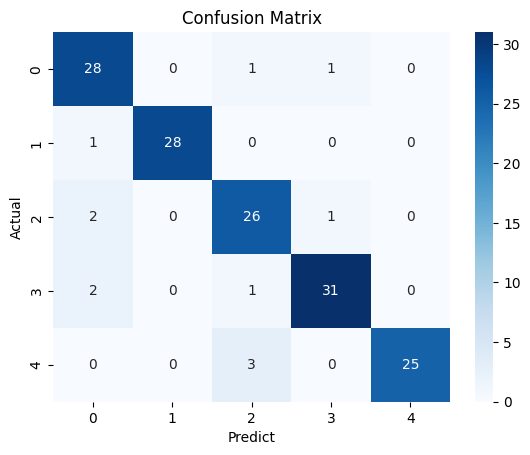

In [21]:
from utils import evaluate_cls_model

evaluate_cls_model(y_pred, y_test)